# Task 2 - Feature Engineering I

Before creating logistic regression models with the NHL data, we want to add and tidy up some existing features to our dataset.

In [1]:
from ift6758.data.nhl_data_parser import NHLDataParser
data_parser = NHLDataParser()

We want to separate the dataset into two subsets, a training & validation set (2016-2017 to 2019-2020) and a test set (2020-2021). These datasets will contain games only from the regular season.

In [2]:
train_df = data_parser.get_shot_and_goal_pbp_df_for_seasons(2016, 2018, with_playoff_season=False)
validation_df = data_parser.get_shot_and_goal_pbp_df_for_season(2019, with_playoff_season=False)
test_df = data_parser.get_shot_and_goal_pbp_df_for_season(2020, with_playoff_season=False)

We now want to visualize our dataset (2016-17 to 2019-20) to see if we can find anything interesting.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df = data_parser.get_shot_and_goal_pbp_df_for_seasons(2016, 2019, with_playoff_season=False)

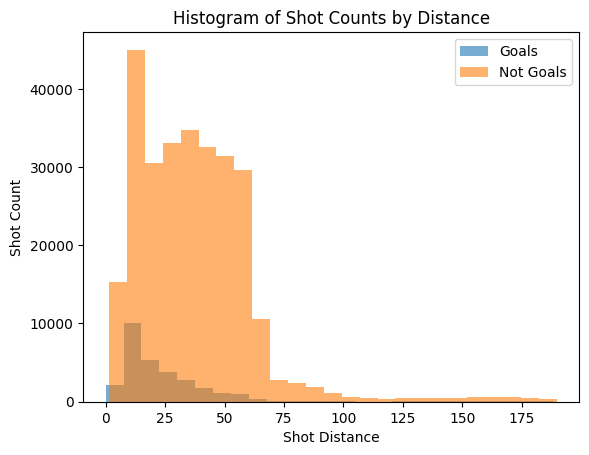

In [18]:
goals_df = df[df['isGoal'] == 1]
not_goals_df = df[df['isGoal'] == 0]

plt.hist(goals_df['shotDistance'], bins=25, alpha=0.6, label='Goals')
plt.hist(not_goals_df['shotDistance'], bins=25, alpha=0.6, label='Not Goals')
plt.xlabel('Shot Distance')
plt.ylabel('Shot Count')
plt.title('Histogram of Shot Counts by Distance')
plt.legend()
plt.show()

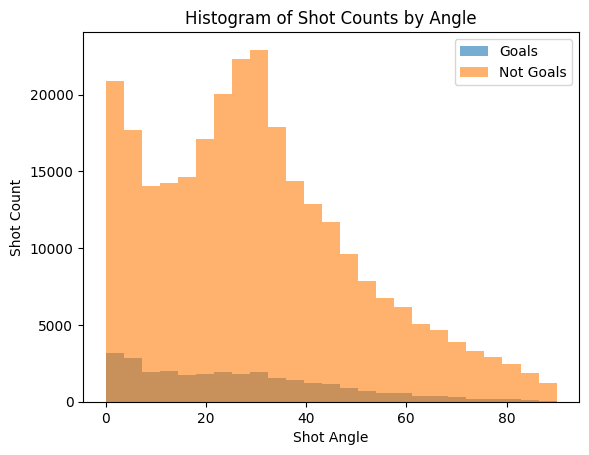

In [19]:
plt.hist(goals_df['shotAngle'], bins=25, alpha=0.6, label='Goals')
plt.hist(not_goals_df['shotAngle'], bins=25, alpha=0.6, label='Not Goals')
plt.xlabel('Shot Angle')
plt.ylabel('Shot Count')
plt.title('Histogram of Shot Counts by Angle')
plt.legend()
plt.show()

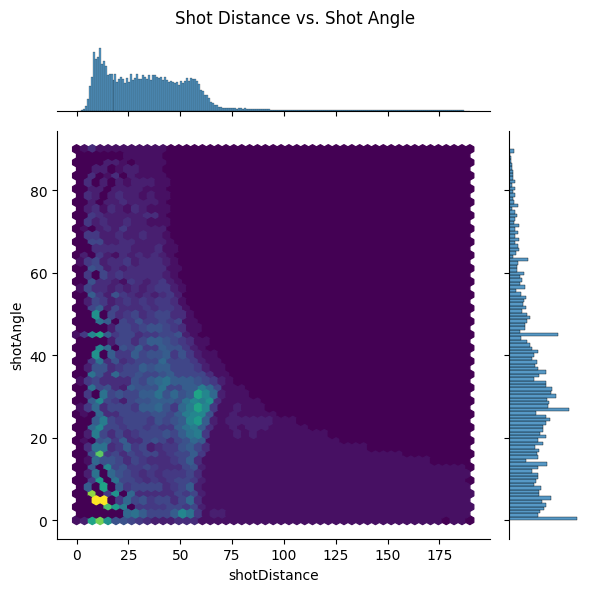

In [24]:
sns.jointplot(x='shotDistance', y='shotAngle', data=df, kind='hex', cmap='viridis', bins=25)
plt.suptitle('Shot Distance vs. Shot Angle')
plt.tight_layout()
plt.show()